## Install these dependencies

In [ ]:
# pip install nltk
# pip install  gensim

## Reading the DATASET

In [1]:
text=open("final_dataset.txt").read()

## Processing the dataset

In [4]:
import re 
from nltk.tokenize import sent_tokenize, word_tokenize 

from nltk.corpus import stopwords


def preprocessing(text):
    '''Cleaning of the text'''
    ## lowering the text so same words are not treated differently.
    lowered = text.lower()
    
    newString = re.sub(r"'s\b","",lowered)
    
    # remove punctuations
    newString = re.sub("[^a-zA-Z]", " ", newString)
    
    # remove white space
    COMBINE_WHITESPACE = re.compile(r"\s+")

    filtered_text = COMBINE_WHITESPACE.sub(" ", newString).strip()
    return filtered_text.split(" ")


def remove_stopwords(processed_text):
    ''' We remove stopwords from the text '''
    stop_words = set(stopwords.words('english'))
    removed_stopwords=[]
    for w in processed_text: 
        if w not in stop_words: 
            removed_stopwords.append(w)
    return removed_stopwords

def process(text):
    '''Using map to speed up the process'''
    preprocessed_text=list(map(preprocessing,sent_tokenize(text)))
    removed_stopwords=list(map(remove_stopwords,preprocessed_text))
    return removed_stopwords


In [3]:
processed_sentences=process(text)

## Trainiing the model

In [5]:
from gensim.models import Word2Vec

In [6]:
##32 is the size of vector we want and  min_count will ignore all words with total frequency lower than this.
model=Word2Vec(processed_sentences,size=32,min_count=1) 

In [7]:
# You can also use inbuilt method most_similar to find all the similar to input word
#note that these will be totally based on the training data and not a generalized similarity like in English language.
model.most_similar(['loan'])

C:\Users\GSC-30397\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('controlled', 0.9989014863967896),
 ('originally', 0.9988721609115601),
 ('finally', 0.9988323450088501),
 ('ebay', 0.998799204826355),
 ('failure', 0.9986884593963623),
 ('approved', 0.9986734390258789),
 ('eventually', 0.9986013770103455),
 ('payment', 0.9985873699188232),
 ('boom', 0.998572051525116),
 ('label', 0.9985622763633728)]

In [8]:
## WE are just iterating over each word in our vocabulary and storing the vector representation of word in a list
embeddings=[]
for key in model.wv.vocab.keys():
    embedding=model[key]
    embeddings.append(embedding)

C:\Users\GSC-30397\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [9]:
print("Size of Vocab-->",len(embeddings))

Size of Vocab--> 27758


## Dimentionality reduction

In [80]:
# Since we are dealing with a vector of size 32 we cant visualize it on a graph so we need to convert that 32 dimension vector 
# to a smalle dimension like a 2 dimension vector . We can use PCA for this which a pretty common technique to do it.

In [10]:
from sklearn.decomposition import PCA

In [11]:
# n_components is the size of output vector we are expecting.
pca=PCA(n_components=2)
downsized_embeddings=pca.fit_transform(embeddings)

In [12]:
## list of all the words in the vocab . wv.vocab is another inbuilt property we can use. 
words = list(model.wv.vocab)

## Ploting word embeddings

In [13]:
from matplotlib import pyplot

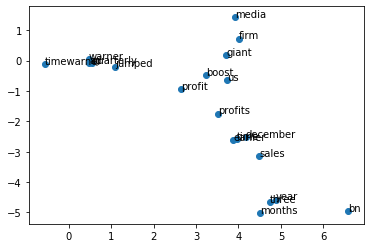

In [15]:
pyplot.scatter(downsized_embeddings[:20, 0],downsized_embeddings[:20, 1])
for i, word in enumerate(words[:20]):
    pyplot.annotate(word, xy=(downsized_embeddings[i, 0], downsized_embeddings[i, 1]))
pyplot.show()